# Exercise 1: Binary Classification Introduction
Neural Network Classification - Module 3

This exercise covers:
- Creating synthetic data with make_circles
- Visualizing classification data with matplotlib
- Setting up device-agnostic code (CPU/GPU)
- Building a linear model (CircleModelV0)
- Making initial predictions

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
torch.manual_seed(42)
np.random.seed(42)

## Part 1: Creating make_circles Dataset

**Create make_circles dataset**

In [3]:
n_samples = 1000
X, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    factor=0.5,
    random_state=42
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Class 0 samples: {sum(y == 0)}")
print(f"Class 1 samples: {sum(y == 1)}")

X shape: (1000, 2)
y shape: (1000,)
Class 0 samples: 500
Class 1 samples: 500


## Part 2: Visualizing the Data

**Create scatter plot**

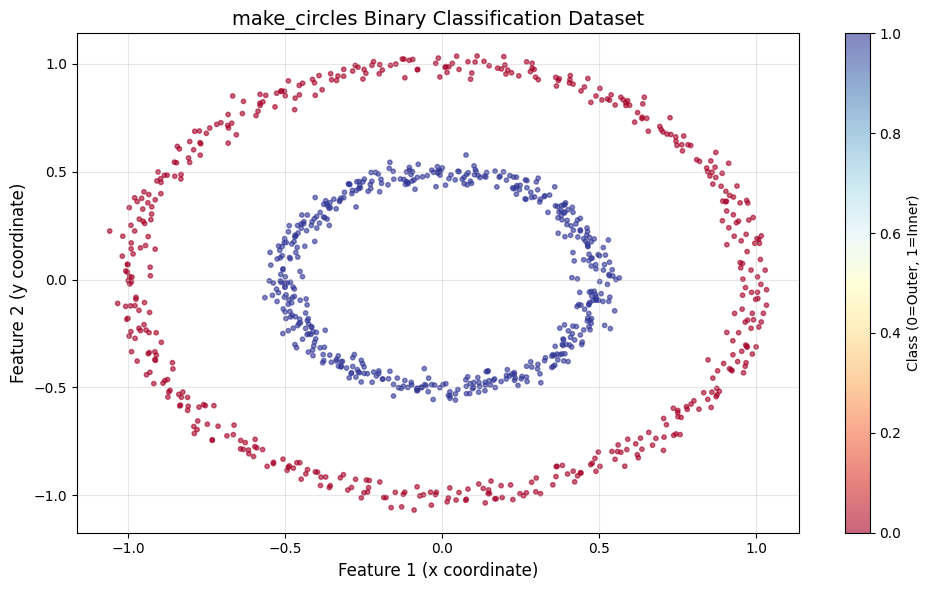

Visualization created!
Motto: Visualize, visualize, visualize!


In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title('make_circles Binary Classification Dataset', fontsize=14)
plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class (0=Outer, 1=Inner)')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")

## Part 3: Train/Test Split

**Split data into 80% train, 20% test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Training size: 800 (80.0%)
Test size: 200 (20.0%)


**Visualize the split**

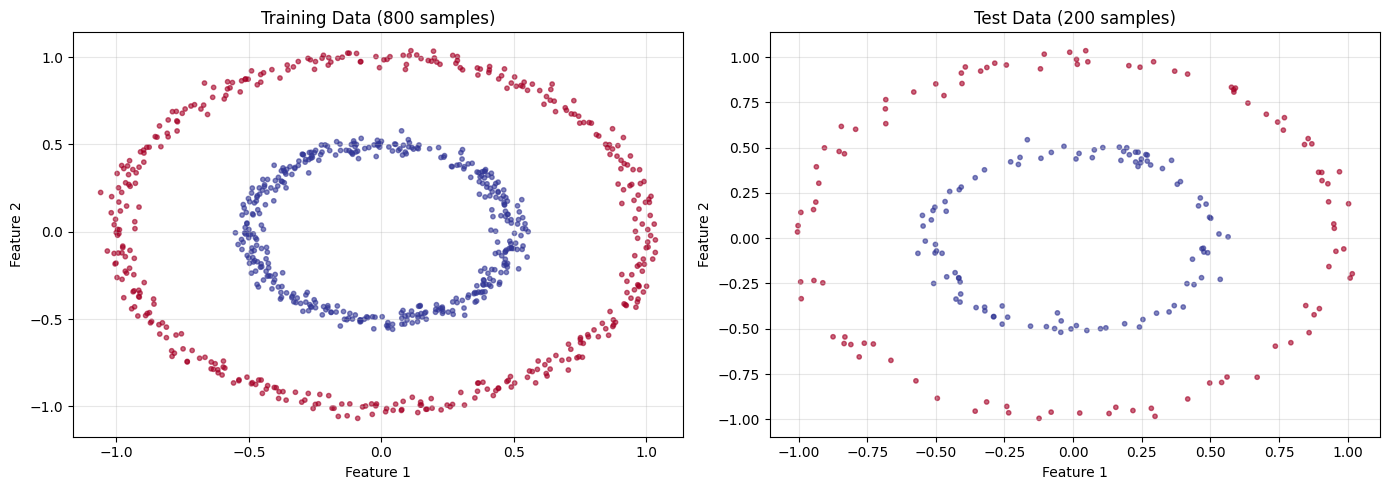

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
axes[0].set_title(f'Training Data ({len(X_train)} samples)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
axes[1].set_title(f'Test Data ({len(X_test)} samples)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 4: Device-Agnostic Setup

**Set up device**

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Using device: cpu


**Convert to PyTorch tensors and move to device**

In [8]:
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

print(f"\nTensor shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTensor dtypes:")
print(f"X_train: {X_train.dtype}")
print(f"y_train: {y_train.dtype}")


Tensor shapes:
X_train: torch.Size([800, 2])
y_train: torch.Size([800, 1])
X_test: torch.Size([200, 2])
y_test: torch.Size([200, 1])

Tensor dtypes:
X_train: torch.float32
y_train: torch.float32


## Part 5: Building CircleModelV0 (Linear)

**Define linear model**

In [9]:
class CircleModelV0(nn.Module):
    """Linear model for binary classification"""

    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        super(CircleModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            # Note: No activation (linear model)
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layer_stack(x)

**Create the model**

In [10]:
model = CircleModelV0(input_size=2, hidden_size=8, output_size=1)
model = model.to(device)
model

CircleModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [11]:
import torchinfo

torchinfo.summary(model)

Layer (type:depth-idx)                   Param #
CircleModelV0                            --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       24
│    └─Linear: 2-2                       9
Total params: 33
Trainable params: 33
Non-trainable params: 0

**Count parameters**

In [12]:
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")


Total parameters: 33


## Part 6: Initial Predictions

**Make predictions on test set**

In [13]:
model.eval()
with torch.inference_mode():
    # Forward pass (raw logits)
    test_logits = model(X_test)

    # Convert to probabilities
    test_probs = torch.sigmoid(test_logits)

    # Convert to labels
    test_preds = (test_probs > 0.5).long()

**Show some examples**

In [14]:
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"  Sample {i+1}:")
    print(f"    Logits: {test_logits[i].item():.4f}")
    print(f"    Probability: {test_probs[i].item():.4f}")
    print(f"    Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")


First 5 predictions:
  Sample 1:
    Logits: -0.2368
    Probability: 0.4411
    Predicted: 0, Actual: 1.0
  Sample 2:
    Logits: -0.4788
    Probability: 0.3825
    Predicted: 0, Actual: 0.0
  Sample 3:
    Logits: 0.0261
    Probability: 0.5065
    Predicted: 1, Actual: 1.0
  Sample 4:
    Logits: -0.4316
    Probability: 0.3937
    Predicted: 0, Actual: 0.0
  Sample 5:
    Logits: 0.0281
    Probability: 0.5070
    Predicted: 1, Actual: 1.0


**Calculate initial accuracy**

In [15]:
accuracy = (test_preds == y_test).float().mean()
print(f"\nInitial Test Accuracy: {accuracy.item()*100:.2f}%")


Initial Test Accuracy: 49.50%


## Part 7: Understanding the Logits → Labels Pipeline

**Demonstrate the pipeline**

In [16]:
sample_idx = 4
logit = test_logits[sample_idx].item()
prob = test_probs[sample_idx].item()
pred = test_preds[sample_idx].item()
actual = y_test[sample_idx].item()

print(f"\nSample {sample_idx + 1}:")
print(f"  Input: X={X_test[sample_idx].cpu().numpy()}")
print(f"  1. Logits (raw output): {logit:.4f}")
print(f"  2. Probability (sigmoid): {prob:.4f}")
print(f"  3. Label (threshold > 0.5): {pred}")
print(f"  Actual label: {actual}")


Sample 5:
  Input: X=[ 0.24166879 -0.49045518]
  1. Logits (raw output): 0.0281
  2. Probability (sigmoid): 0.5070
  3. Label (threshold > 0.5): 1
  Actual label: 1.0


## Exercises

**Exercise 1: Experiment with different noise levels**

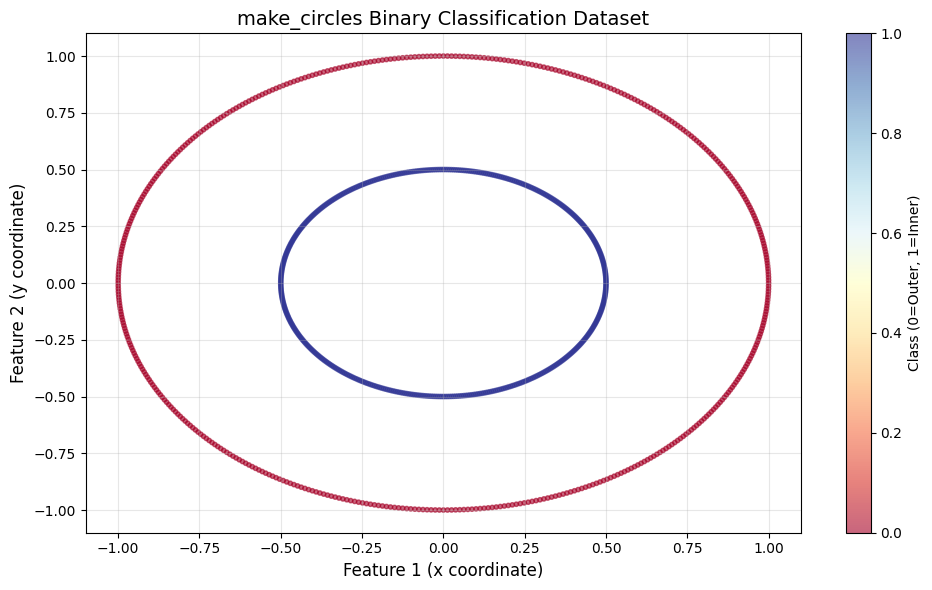

Visualization created!
Motto: Visualize, visualize, visualize!


In [17]:
# noise = 0.0

X, y = make_circles(
    n_samples=n_samples,
    noise=0.00,
    factor=0.5,
    random_state=42
)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title('make_circles Binary Classification Dataset', fontsize=14)
plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class (0=Outer, 1=Inner)')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")

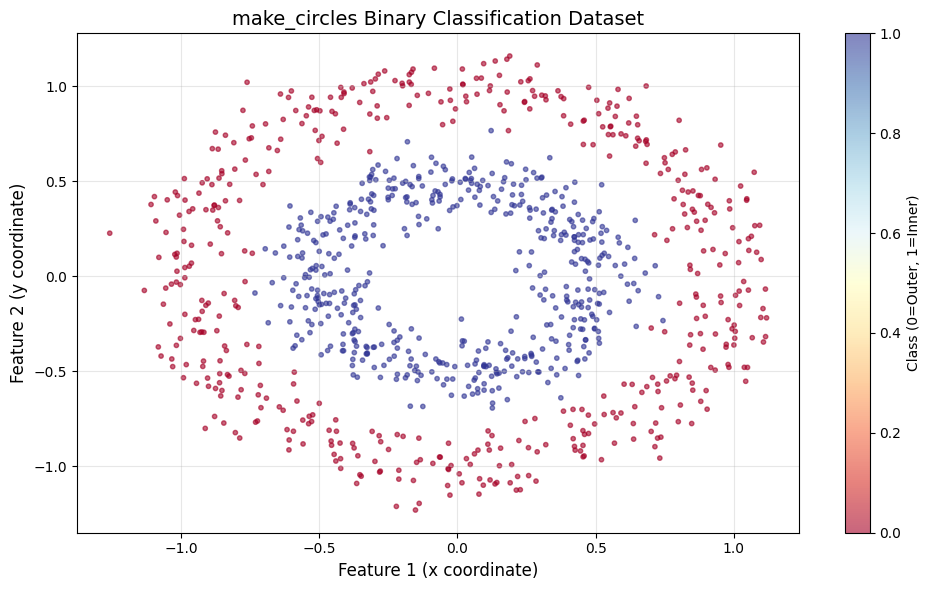

Visualization created!
Motto: Visualize, visualize, visualize!


In [18]:
# noise = 0.1

X, y = make_circles(
    n_samples=n_samples,
    noise=0.1,
    factor=0.5,
    random_state=42
)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title('make_circles Binary Classification Dataset', fontsize=14)
plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class (0=Outer, 1=Inner)')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")

**Exercise 2: Try different random seeds**


Random seed: 42


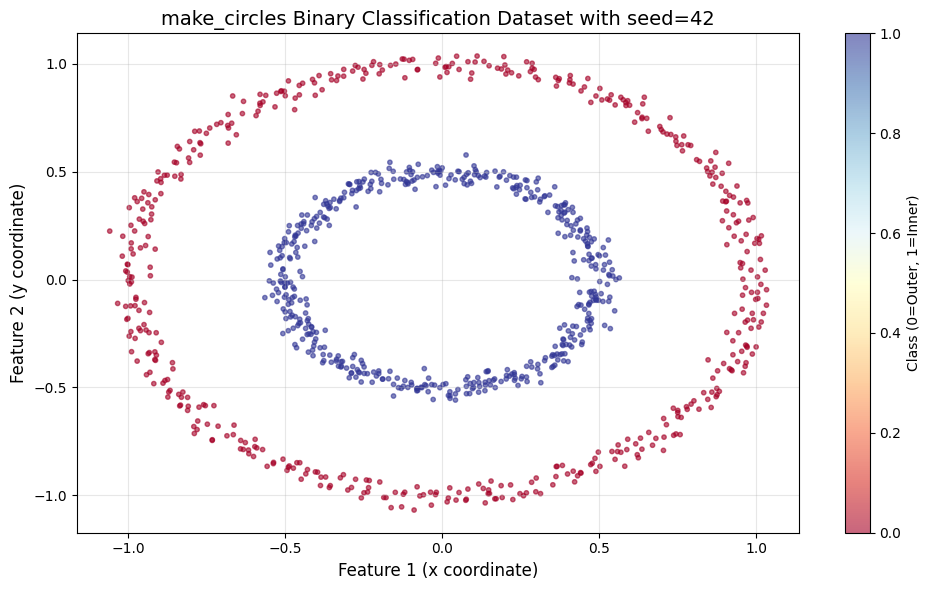

-------------------------------------------------------------------------------- 


Random seed: 123


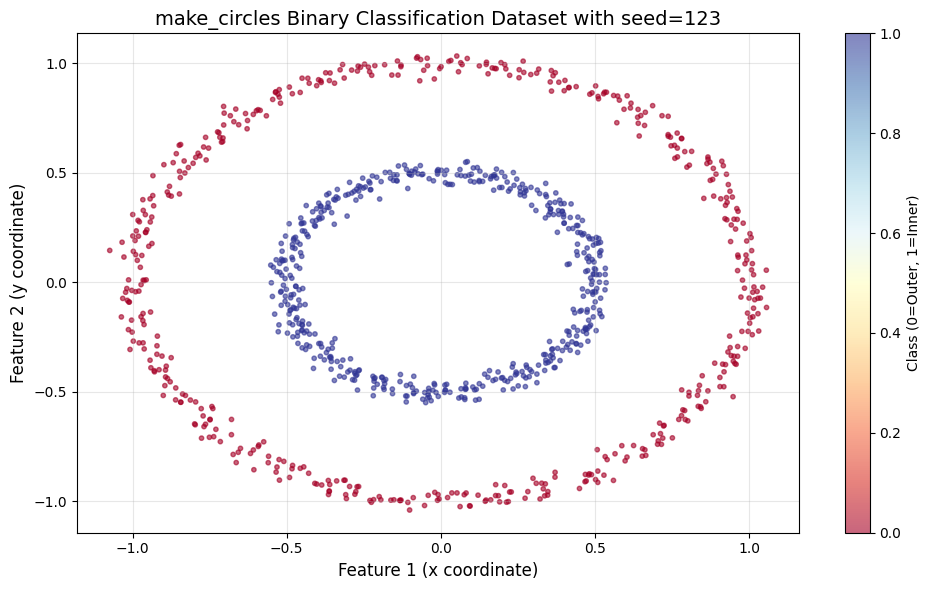

-------------------------------------------------------------------------------- 


Random seed: 456


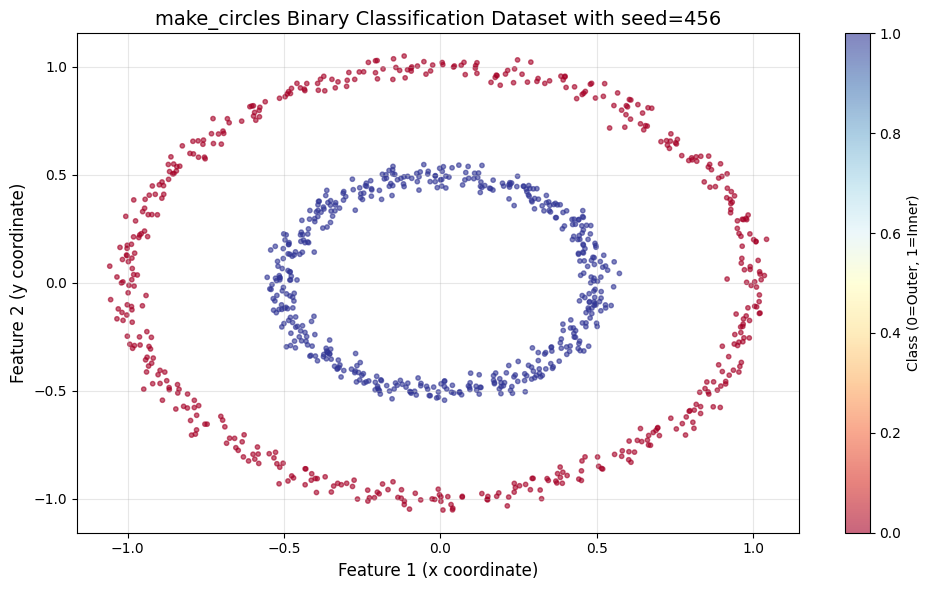

-------------------------------------------------------------------------------- 



In [19]:
seeds = [42, 123, 456]

for seed in seeds:
    torch.manual_seed(seed)
    np.random.seed(seed)
    print(f"\nRandom seed: {seed}")

    X, y = make_circles(
        n_samples=n_samples,
        noise=0.03,
        factor=0.5,
        random_state=seed
    )

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
    plt.title(f'make_circles Binary Classification Dataset with seed={seed}', fontsize=14)
    plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
    plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class (0=Outer, 1=Inner)')
    plt.tight_layout()
    plt.show()

    print("-" * 80, "\n")

## Exercise 3: Change train/test split ratio

**- test_size=0.2 (80/20 split)**

Training size: 800 (80.0%)
Test size: 200 (20.0%)


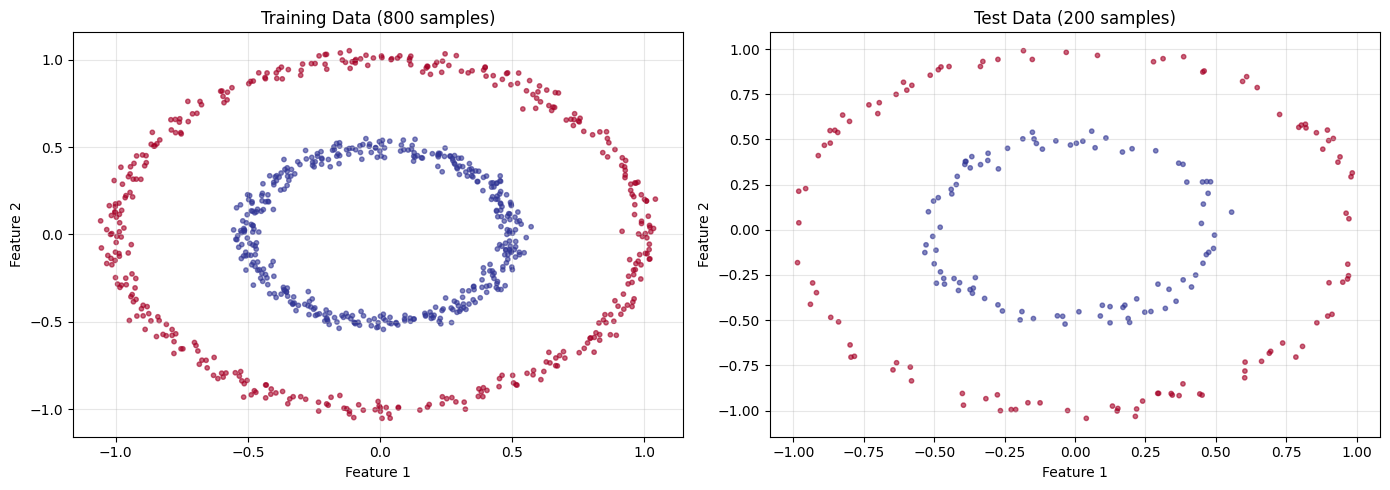

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
axes[0].set_title(f'Training Data ({len(X_train)} samples)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
axes[1].set_title(f'Test Data ({len(X_test)} samples)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Training size: 700 (70.0%)
Test size: 300 (30.0%)


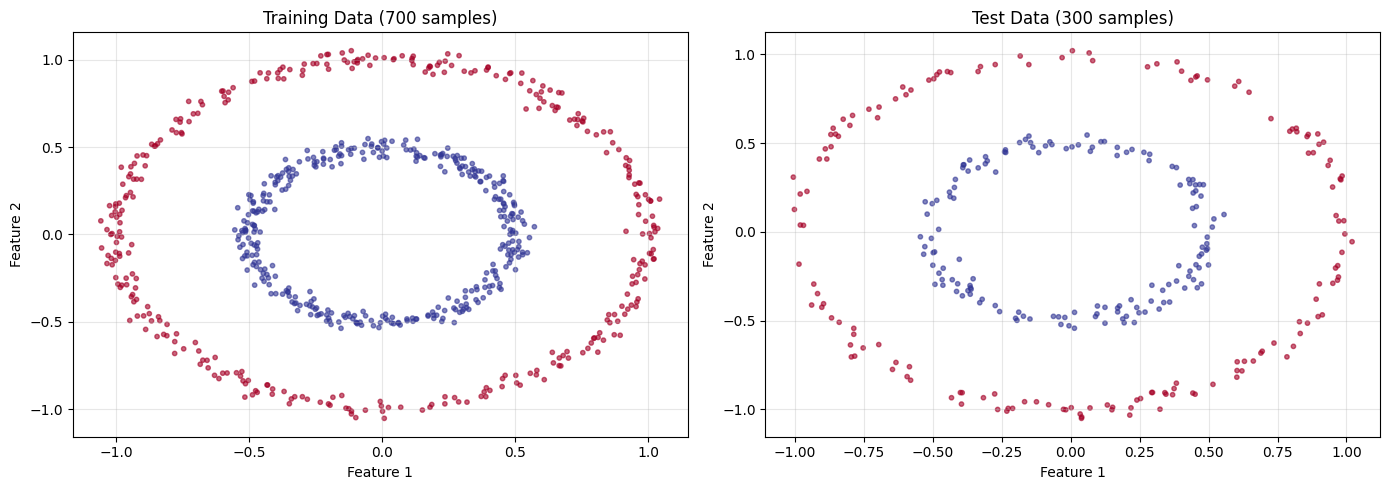

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
axes[0].set_title(f'Training Data ({len(X_train)} samples)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
axes[1].set_title(f'Test Data ({len(X_test)} samples)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Training size: 500 (50.0%)
Test size: 500 (50.0%)


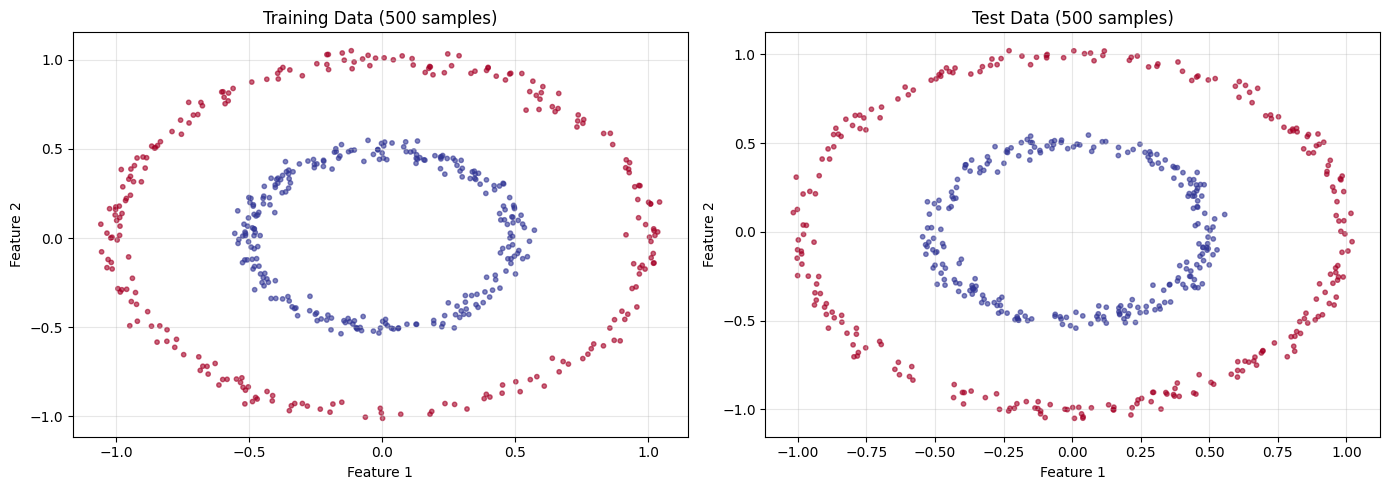

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
axes[0].set_title(f'Training Data ({len(X_train)} samples)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
axes[1].set_title(f'Test Data ({len(X_test)} samples)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercise 4: Explore different hidden sizes

In [23]:
hidden_sizes = [4, 8, 16]

In [24]:
for hidden_size in hidden_sizes:
    print(f"\nModel with hidden size={hidden_size}", "\n")

    model = CircleModelV0(input_size=2, hidden_size=hidden_size, output_size=1)
    model = model.to(device)

    print(torchinfo.summary(model))
    print("-" * 80, "\n")


Model with hidden size=4 

Layer (type:depth-idx)                   Param #
CircleModelV0                            --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       12
│    └─Linear: 2-2                       5
Total params: 17
Trainable params: 17
Non-trainable params: 0
-------------------------------------------------------------------------------- 


Model with hidden size=8 

Layer (type:depth-idx)                   Param #
CircleModelV0                            --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       24
│    └─Linear: 2-2                       9
Total params: 33
Trainable params: 33
Non-trainable params: 0
-------------------------------------------------------------------------------- 


Model with hidden size=16 

Layer (type:depth-idx)                   Param #
CircleModelV0                            --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                      

## Exercise 5: Data exploration

In [25]:
# What happens if you increase the noise?
"""
Increasing the noise makes the data points more overlapped and less separable.
As a result, the decision boundary becomes harder to learn, leading to higher training and test loss, as well as lower accuracy.
The model may struggle to capture the true underlying pattern because the signal-to-noise ratio is reduced.
"""

'\nIncreasing the noise makes the data points more overlapped and less separable.\nAs a result, the decision boundary becomes harder to learn, leading to higher training and test loss, as well as lower accuracy.\nThe model may struggle to capture the true underlying pattern because the signal-to-noise ratio is reduced.\n'

In [26]:
# Why does the initial model have ~50% accuracy?
"""
The initial model has approximately 50% accuracy because it has not been trained yet.
With randomly initialized weights and bias, the model essentially makes random predictions.
For a binary classification task, random guessing leads to an accuracy close to 50%.
"""

'\nThe initial model has approximately 50% accuracy because it has not been trained yet.\nWith randomly initialized weights and bias, the model essentially makes random predictions.\nFor a binary classification task, random guessing leads to an accuracy close to 50%.\n'

In [27]:
# Can a linear model separate concentric circles?
"""
No, a linear model cannot separate concentric circles.
A linear model can only create a linear decision boundary (a straight line in 2D), while concentric circles require a non-linear decision boundary.
Therefore, a non-linear model or feature transformation is needed to solve this problem.
"""

'\nNo, a linear model cannot separate concentric circles. \nA linear model can only create a linear decision boundary (a straight line in 2D), while concentric circles require a non-linear decision boundary. \nTherefore, a non-linear model or feature transformation is needed to solve this problem.\n'